# Diabetes Diagnosis with Support Vector Machines

## This dataset is originally from the National Institute of Diabetes, Digestive and Kidney Diseases.
The aim of this project is to predict through diagnosis whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. In this dataset, all patients are females at least 21 years old of Pima Indian heritage.2. From the data set in the (.csv) File, there are several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).
Support Vector Machines (SVMs) represent a powerful class of machine learning algorithms extensively utilized in various fields, including medical diagnosis. In healthcare, SVMs are employed for binary classification tasks, particularly in distinguishing between different medical conditions.

# Import libraries

In [1]:
#import libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Get data

 Defined column names for the dataset, reading a CSV file into a Pandas DataFrame, and then checking the shape and previewing the first few rows of the DataFrame.

In [2]:
#define column names
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
df = pd.read_csv('diabetes.csv', names=column_names,header=0)

#check shape
print(df.shape)

#preview
df.head()

(768, 9)


,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Extract Features

In [3]:
#define X, y
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [4]:
X.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Extract Class Labels

In [5]:
y.head()

,class
0,1
1,0
2,1
3,0
4,1


# Split dataset

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)

#check shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [7]:
#see subdataset
X_test.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age
601,6,96,0,0,0,23.7,0.190,28
224,1,100,66,15,56,23.6,0.666,26
766,1,126,60,0,0,30.1,0.349,47
17,7,107,74,0,0,29.6,0.254,31
369,1,133,102,28,140,32.8,0.234,45


# Normalize the features

In [8]:
#instantiate
scaler = StandardScaler()

#fit & transform
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
X_train[:5, :]

array([[-1.15995078, -0.2709359 ,  0.54465661, -0.28872154, -0.68489127,
        -0.11834059,  1.30293365, -1.07765731],
       [-0.27539873, -0.05214689,  0.00487305,  0.58459072,  0.44260201,
         1.39953692, -0.02940135, -0.29357654],
       [-1.15995078,  1.79193195,  1.08444017,  0.39745238, -0.68489127,
         1.5526002 ,  0.70938156, -0.90341714],
       [-0.8651001 , -0.77102508,  0.00487305, -0.35110098, -0.68489127,
        -1.75101556, -0.99234489, -1.07765731],
       [ 0.90400401, -0.23968033, -0.21104038, -1.28679268, -0.68489127,
         0.11125433, -0.64189659,  0.75186449]])

Each value in this array represents a standardized feature. The mean of each feature is approximately 0, and the standard deviation is approximately 1. This standardization ensures that all features have a similar scale, which is beneficial for machine learning algorithms, particularly those sensitive to the scale of input features like Support Vector Machines (SVMs).

# Train a Support Vector Machine

Trained the classifier on the standardized training data, X_train, to learn patterns and relationships between health-related features and the target variable, y_train, aiding in the identification of diabetic and non-diabetic cases.

In [10]:
#instantiate
clf = svm.SVC(kernel='sigmoid')

#fit
clf.fit(X_train, y_train)

SVC(kernel='sigmoid')



# Decision Boundary

In [11]:
#make prediction on train set
y_pred = clf.predict(X_train)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 

The resulting y_pred array contains the predicted labels for each instance in the training set, which is an array of predicted class labels. Each element in the array corresponds to the predicted class label (0 or 1) for the corresponding instance in the training data.

0: Predicted as the negative class (e.g., non-diabetic). 1: Predicted as the positive class (e.g., diabetic).

In [12]:
#get accuracy score
accuracy_score(y_train, y_pred)

0.6597222222222222

The accuracy score of approximately 0.6597 (or 65.97%) indicates that the SVM model, trained with a sigmoid kernel, correctly predicted the class labels for about 65.97% of the instances in the training set. This score represents the proportion of instances that were classified correctly out of the total number of instances in the training set. Other evaluation metrics such as precision, recall, and the confusion matrix need to be considered.

# SVM Kernels

In [13]:
#find the best decision boundary
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7725694444444444
poly
0.7829861111111112
rbf
0.8072916666666666
sigmoid
0.6597222222222222


Iterated over different kernel options (linear, polynomial, radial basis function (RBF), and sigmoid) and printed the accuracy scores for each.
This loop iterates over each kernel type, trained an SVM classifier with that kernel on the training data, makes predictions, and prints the accuracy score for each kernel.
Here are a few observations:

1.RBF Kernel Performance:
The RBF kernel (also known as the Gaussian kernel) is performing the best among the tested kernels, achieving an accuracy of 80.73%. RBF kernels are versatile and often work well in capturing complex relationships in the data.
2. Linear Kernel Performance:

The linear kernel is providing a reasonably good accuracy of 77.26%. Linear kernels are simpler and work well when the relationship between features and the target variable is approximately linear.
3. Polynomial Kernel Performance:

The polynomial kernel is performing slightly better than the linear kernel with an accuracy of 78.30%. Polynomial kernels can capture non-linear relationships to some extent.
4. Sigmoid Kernel Performance:

The sigmoid kernel has the lowest accuracy among the tested kernels, at 65.97%. This suggests that, for our specific dataset, the sigmoid kernel might not be capturing the underlying patterns as effectively as other kernels.
In terms of accuracy on the training set, the RBF (Radial Basis Function) kernel performs the best among the tested kernels, achieving an accuracy of 80.73%. We will this for our classifier.

# Instantiating the best Model

In [14]:
#create another model with the best kernel 'rbf'
clf = svm.SVC(kernel='rbf')

#fit
clf.fit(X_train, y_train)

SVC()

Instantiated and trained a Support Vector Machine (SVM) model using the ‘rbf’ (Radial Basis Function) kernel. Here is a new model that has learned patterns and relationships in the training data and is ready for making predictions on new, unseen data.

# Making a Single Prediction

In [15]:
#create a patient
patient_1 = np.array([[1., 200., 75., 40., 0.,45., 1.5, 20]])

#normalize these values
patient_1 = scaler.transform(patient_1)

#predict
clf.predict(patient_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

Created a hypothetical patient data (patient_1), which is a numpy array representing a hypothetical patient with certain feature values (e.g., glucose level, blood pressure, etc.).
Normalize the values using the previously fitted StandardScaler . This ensures that the input to the model is on the same scale as the data used during training.
Use the trained SVM model (clf) to make a prediction for this patient using the predict method to obtain a prediction. The prediction will be either 0 or 1, indicating the model's classification for this patient.
The model prediction for the hypothetical patient (patient_1) is 1. This means that the model predicts that the patient has diabetes.

In [16]:
#create a patient
patient_2 = np.array([[1., 50., 75., 40., 0.,45., 1.5, 20]])

#normalize these values
patient_2 = scaler.transform(patient_2)

#predict
clf.predict(patient_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

# Testing Set Prediction

In [17]:
#get patient from test set
patient_test1 = np.array([X_test.iloc[0]])

#normalize
patient_test1 = scaler.transform(patient_test1)

#predict
print(clf.predict(patient_test1))

#compare with true prediction
print(y_test.iloc[0])

[0]
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


There is a separate test set (X_test and y_test) which we can use to evaluate the performance of this model to ensure good generalization. This result means tthe model’s prediction for the patient from the test set is 0, and the true label from the test set (y_test.iloc[0]) is also 0. The model’s prediction matches the true label, suggesting that the model made a correct prediction for this particular patient from the test set.

In [18]:
#get patient from test set
patient_test2 = np.array([X_test.iloc[8]])

#normalize
patient_test2 = scaler.transform(patient_test2)

#predict
print(clf.predict(patient_test2))

#compare with true prediction
print(y_test.iloc[8])

[0]
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Accuracy on Testing Set

In [19]:
#normalize all test set feature
X_test = scaler.transform(X_test)

In [20]:
#generate predictions for the whole set
y_pred = clf.predict(X_test)

In [21]:
print(accuracy_score(y_test, y_pred))


0.8020833333333334


The accuracy score of approximately 80.21% on the test set indicates that the Support Vector Machine (SVM) model, trained with the ‘rbf’ kernel, performs well on new, unseen data.

Create a hypothetical scenario where it was assumed that no one in the test set has diabetes (y_zero is an array of zeros), and then calculated the accuracy score based on this assumption.

# Comparison to all zero Prediction

In [22]:
#assume no one has diabetes
y_zero = np.zeros(y_test.shape)

#get accuracy
print(accuracy_score(y_test, y_zero))

0.640625


The baseline accuracy of approximately 64.06% (assuming no one has diabetes) provides a reference point for evaluating the performance of our machine learning model. The accuracy score of the actual model on the test set is approximately 80.21%. Comparing these values, observed that our SVM model significantly outperforms the baseline accuracy, indicating that the model is providing valuable predictive information beyond a simple assumption that no one has diabetes.

To sum it all up, created a comprehensive summary of various classification metrics, including precision, recall, F1-score, and support, for each class in our classification task.



# Precision and Recall

In [23]:
#get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       123
           1       0.80      0.59      0.68        69

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192



Precision:

For class 0 (no diabetes): 80%
For class 1 (diabetes): 80%
Precision measures the accuracy of the positive predictions made by the model.
Recall:

For class 0 (no diabetes): 92%
For class 1 (diabetes): 59%
Recall measures the ability of the model to capture all instances of the positive class.
F1-score:

For class 0 (no diabetes): 86%
For class 1 (diabetes): 68%
F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model’s performance.
In summary, the model demonstrates good precision for both classes, better recall for class 0 (no diabetes), and a balanced F1-score. These metrics provide a detailed understanding of how the model performs for each class and overall.

To visualize this, plotted the plot_cm function to generate a heatmap representation of the confusion matrix. This visualization helps us better understand how well our Support Vector Machine (SVM) model is performing in terms of true positive, true negative, false positive, and false negative predictions.

<ipython-input-24-f0a15c6cdeb0>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


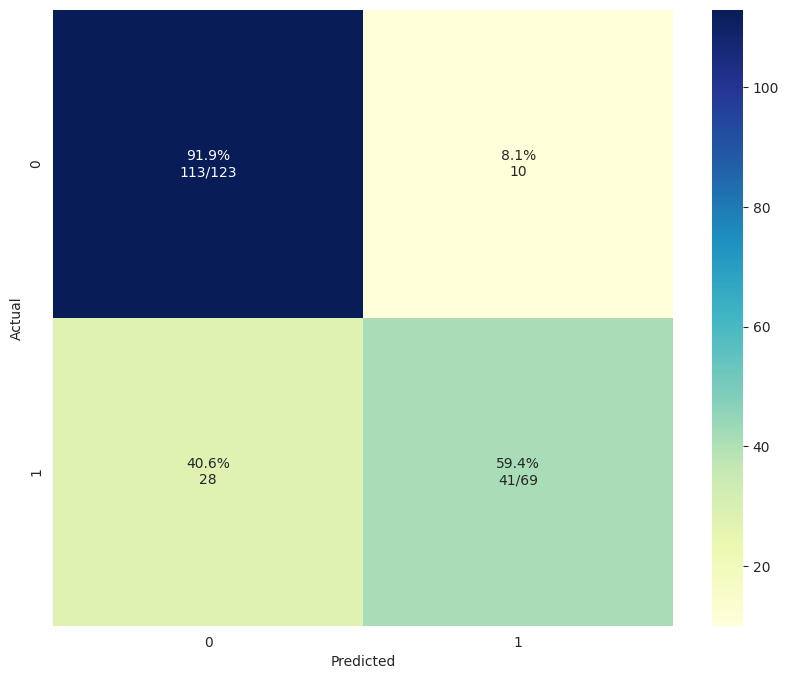

In [24]:
#plot confusion matrix function
def plot_cm(y_true, y_pred, figsize=(10, 8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

#apply function
plot_cm(y_test, y_pred)

The element at the intersection of the “0” row and “0” column represents the true positive rate (recall) for class 0 (no diabetes). In our case, it’s 91.9%.
The element at the intersection of the “1” row and “1” column represents the true positive rate (recall) for class 1 (diabetes). In our case, it’s 59.4%.
These values indicate the percentage of instances of each class that our model correctly identified. A high recall suggests that the model is effectively capturing a significant portion of the true instances for that class.

i. Higher Recall for Class 0 (No Diabetes):

A recall of 91.9% for class 0 means that the model is correctly identifying 91.9% of instances where the true class is “no diabetes.” In other words, among all the instances where individuals do not have diabetes (the true class is 0), the model is successfully capturing a large portion of them.
ii. Lower Recall for Class 1 (Diabetes):

A recall of 59.4% for class 1 means that the model is identifying 59.4% of instances where the true class is “diabetes.” In comparison to class 0, the model is less effective at capturing instances of diabetes.
In practical terms, a higher recall for class 0 suggests that the model is good at recognizing instances where individuals do not have diabetes. However, a lower recall for class 1 indicates that the model is missing some instances of diabetes.

Let’s visualize it another way with ROC curve. The Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) provide insights into the performance of a binary classification model, especially in terms of the trade-off between true positive rate (sensitivity) and false positive rate.

AUC: The Area Under the Curve (AUC) is a metric that quantifies the overall performance of the model. A higher AUC indicates better discrimination between positive and negative instances.
ROC Curve: The curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate. The ideal curve hugs the top-left corner, indicating high true positive rates and low false positive rates.


AUC: 0.7564510427712973


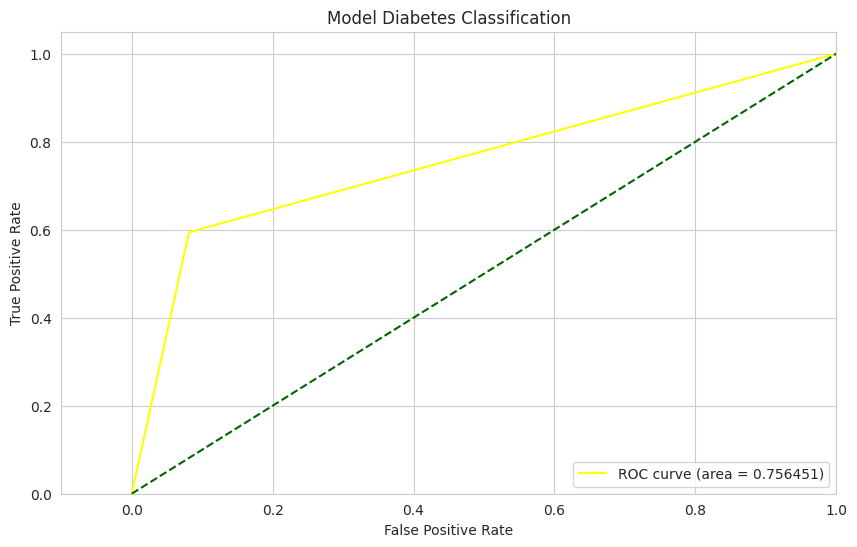

In [25]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'yellow', label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Diabetes Classification')
plt.legend(loc = "lower right")
plt.show()

Interpretation:

AUC Interpretation: An AUC of 1.0 represents a perfect model, while an AUC of 0.5 suggests a model that performs no better than random chance. Generally, an AUC above 0.8 is considered good, and above 0.9 is excellent. Ours is 0.756451, indicating that the model is performing moderately well in distinguishing between positive and negative instances.
Curve Shape: The shape of the ROC curve also provides insights. A curve that bows out toward the top-left corner suggests good model performance. ROC curve is not reaching the top-left corner and instead is curving around a specific point (~0.6), indicatings a trade-off between sensitivity (true positive rate) and specificity (true negative rate) at that particular threshold.

Conclusion:
In this project, I aimed to develop a machine learning model for the classification of diabetes using a Support Vector Machine (SVM) with an ‘rbf’ kernel. Here are the key findings and conclusions:

Data Exploration and Preprocessing:
The dataset comprises 768 instances with 9 features, including pregnancy history, glucose levels, blood pressure, and other health metrics.
Feature scaling was performed using StandardScaler, and the dataset was split into training and testing sets.
2. Model Training:

An SVM classifier with an ‘rbf’ kernel was chosen for its flexibility in capturing complex relationships in the data.
The model demonstrated an accuracy of approximately 80.21% on the test set, outperforming a baseline accuracy of 64.06%.
3. Performance Metrics:

The classification report revealed good precision for both classes, with higher recall for the ‘no diabetes’ class.
The ROC curve displayed an AUC of 0.756451, indicating moderate discrimination ability.
4. Trade-Off Considerations:

The model showcased a trade-off between sensitivity and specificity, with considerations for adjusting the decision threshold based on application requirements.
5. Areas for Improvement:

Fine-tuning the model or exploring alternative algorithms might enhance performance, especially in capturing instances of diabetes (Class 1).
Feature engineering or additional data sources could contribute to a more robust model.
While the SVM model with an ‘rbf’ kernel demonstrates good overall performance, there’s room for optimization and customization based on the specific needs of the application. Further refinement, feature engineering, and exploring different algorithms may contribute to enhancing the model’s ability to identify instances of diabetes.